## 2012.1.1 - 2017.9.2 Baltimore Victim-Based Crime exploratory data analysis


In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
# read in kaggle 2012-2017 dataset
df = pd.read_csv("../2012-2017_BPD_Victim_Based_Crime_Data.csv")
df.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,Total Incidents
0,09/02/2017,23:30:00,3JK,4200 AUDREY AVE,ROBBERY - RESIDENCE,I,KNIFE,913.0,SOUTHERN,Brooklyn,-76.60541,39.22951,"(39.2295100000, -76.6054100000)",ROW/TOWNHO,1
1,09/02/2017,23:00:00,7A,800 NEWINGTON AVE,AUTO THEFT,O,NaN,133.0,CENTRAL,Reservoir Hill,-76.63217,39.31360,"(39.3136000000, -76.6321700000)",STREET,1
2,09/02/2017,22:53:00,9S,600 RADNOR AV,SHOOTING,Outside,FIREARM,524.0,NORTHERN,Winston-Govans,-76.60697,39.34768,"(39.3476800000, -76.6069700000)",Street,1
3,09/02/2017,22:50:00,4C,1800 RAMSAY ST,AGG. ASSAULT,I,OTHER,934.0,SOUTHERN,Carrollton Ridge,-76.64526,39.28315,"(39.2831500000, -76.6452600000)",ROW/TOWNHO,1
4,09/02/2017,22:31:00,4E,100 LIGHT ST,COMMON ASSAULT,O,HANDS,113.0,CENTRAL,Downtown West,-76.61365,39.28756,"(39.2875600000, -76.6136500000)",STREET,1


## Data cleaning and preparation

Post and CrimeCode dropped. Inside/Ouside cleaned. "Time of Day" and "Day of Week" series added. No null values have been dropped (for example, there are 10,000 nulls in "Inside/Outside", or 3% of the data). 


In [3]:
# data cleaning and organization

# remove series
df.drop(columns=["CrimeCode", "Post"], inplace=True)

# consolidate Inside/Outside values, merging "O" and "I" with "Outside" and "Inside"
df["Inside/Outside"] = df["Inside/Outside"].replace({"Outside": "O", "Inside": "I"})

# convert day to datetime data type
df.CrimeDate = pd.to_datetime(df.CrimeDate)

# change midnight for to_datetime
# create temp series CrimeTimeTemp for splitting data into Time of Day
df.loc[df.CrimeTime == "24:00:00", "CrimeTime"] = "00:00:00"
df["CrimeTimeTemp"] = pd.to_datetime(df.CrimeTime, format="%H:%M:%S")

# create bins and labels for morning, afternoon, evening, late night
# -1 because it kept populating "Time of Day" with NaN for any 0 hours (12am)
bins = [-1, 6, 12, 18, 24]
labels = ["Late Night", "Morning", "Afternoon", "Evening"]

# pd.cut likes ints, so dt.hour extracts the hour for comparison with bins
# remove CrimeTimeTemp from the df
df["Time of Day"] = pd.cut(df.CrimeTimeTemp.dt.hour, bins=bins, labels=labels)
# df.drop(columns=["CrimeTimeTemp"], inplace=True)

# add 'Day of Week' series
df["Day of Week"] = df["CrimeDate"].dt.day_name()

In [4]:
df

,CrimeDate,CrimeTime,Location,Description,Inside/Outside,Weapon,District,Neighborhood,Longitude,Latitude,Location 1,Premise,Total Incidents,CrimeTimeTemp,Time of Day,Day of Week
0,2017-09-02,23:30:00,4200 AUDREY AVE,ROBBERY - RESIDENCE,I,KNIFE,SOUTHERN,Brooklyn,-76.60541,39.22951,"(39.2295100000, -76.6054100000)",ROW/TOWNHO,1,1900-01-01 23:30:00,Evening,Saturday
1,2017-09-02,23:00:00,800 NEWINGTON AVE,AUTO THEFT,O,NaN,CENTRAL,Reservoir Hill,-76.63217,39.31360,"(39.3136000000, -76.6321700000)",STREET,1,1900-01-01 23:00:00,Evening,Saturday
2,2017-09-02,22:53:00,600 RADNOR AV,SHOOTING,O,FIREARM,NORTHERN,Winston-Govans,-76.60697,39.34768,"(39.3476800000, -76.6069700000)",Street,1,1900-01-01 22:53:00,Evening,Saturday
3,2017-09-02,22:50:00,1800 RAMSAY ST,AGG. ASSAULT,I,OTHER,SOUTHERN,Carrollton Ridge,-76.64526,39.28315,"(39.2831500000, -76.6452600000)",ROW/TOWNHO,1,1900-01-01 22:50:00,Evening,Saturday
4,2017-09-02,22:31:00,100 LIGHT ST,COMMON ASSAULT,O,HANDS,CENTRAL,Downtown West,-76.61365,39.28756,"(39.2875600000, -76.6136500000)",STREET,1,1900-01-01 22:31:00,Evening,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276524,2012-01-01,00:00:00,1400 JOH AVE,LARCENY,I,NaN,SOUTHWESTERN,Violetville,-76.67195,39.26132,"(39.2613200000, -76.6719500000)",OTHER - IN,1,1900-01-01 00:00:00,Late Night,Sunday
276525,2012-01-01,00:00:00,5500 SINCLAIR LN,LARCENY,O,NaN,NORTHEASTERN,Frankford,-76.53829,39.32493,"(39.3249300000, -76.5382900000)",OTHER - OU,1,1900-01-01 00:00:00,Late Night,Sunday
276526,2012-01-01,00:00:00,400 N PATTERSON PK AV,LARCENY,O,NaN,EASTERN,CARE,-76.58497,39.29573,"(39.2957300000, -76.5849700000)",STREET,1,1900-01-01 00:00:00,Late Night,Sunday
276527,2012-01-01,00:00:00,5800 LILLYAN AV,BURGLARY,I,NaN,NORTHEASTERN,Glenham-Belhar,-76.54578,39.34701,"(39.3470100000, -76.5457800000)",APT. LOCKE,1,1900-01-01 00:00:00,Late Night,Sunday


## Crime by Time of Day (a.k.a., most popular morning crime)

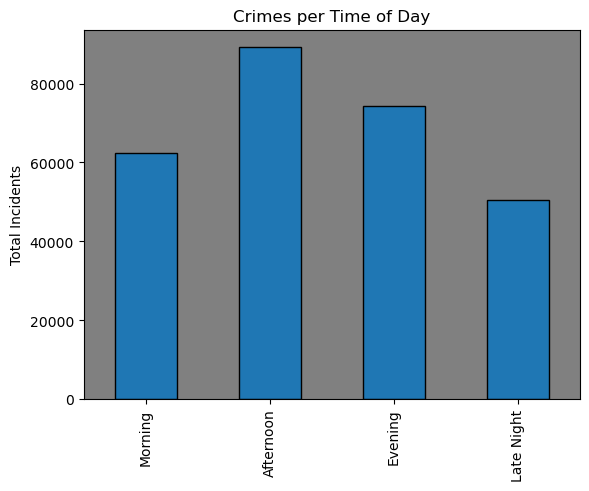

In [5]:
crime_tod = df["Time of Day"].value_counts()
crime_tod = crime_tod.reindex(["Morning", "Afternoon", "Evening", "Late Night"])
crime_tod.plot.bar(edgecolor="black")
plt.title("Crimes per Time of Day")
plt.ylabel("Total Incidents")
plt.gca().set_facecolor('grey')


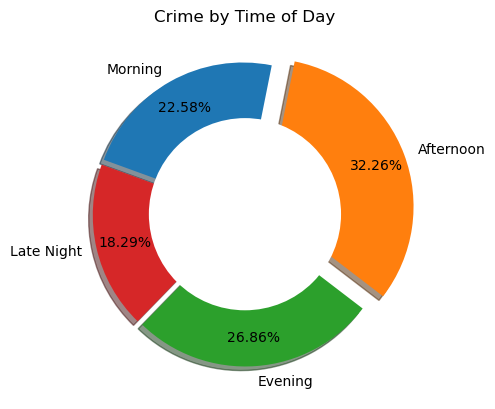

In [6]:
plt.pie(
    crime_tod.values,
    labels=crime_tod.index,
    explode=(0.03, 0.15, 0.03, 0.03),
    shadow=True,
    startangle=160,
    autopct="%1.2f%%",
    pctdistance=0.8,
    counterclock=False,
)

plt.title("Crime by Time of Day")

# gcf get current figure, gca get current axis
donut = plt.Circle((0, 0), 0.65, facecolor="white")
plt.gcf().gca().add_artist(donut)

plt.show()

## Breakdown time over years


<Axes: xlabel='CrimeDate'>

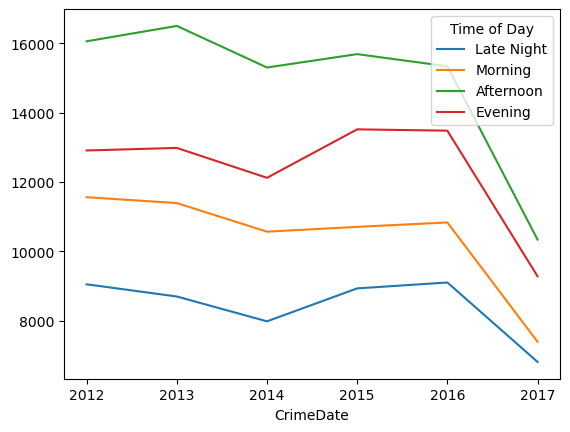

In [21]:
# why we need to drop 2017
# unstack pivots the table
x = df.groupby([df["CrimeDate"].dt.year, "Time of Day"]).size().unstack()

x.plot(kind='line')

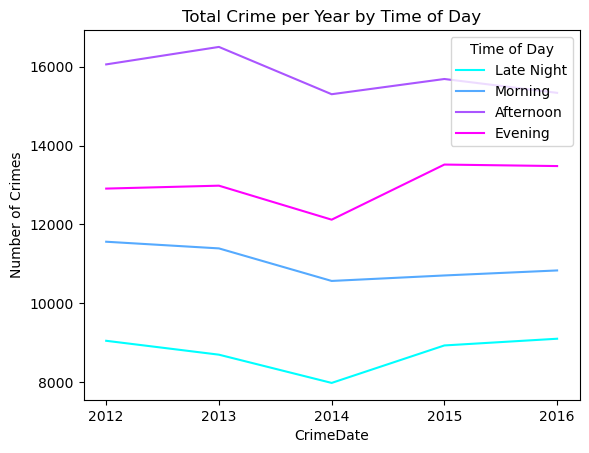

In [24]:
pre2017_df = df[df.CrimeDate.dt.year < 2017]

# unstack pivots the table
x = pre2017_df.groupby([pre2017_df.CrimeDate.dt.year, "Time of Day"]).size().unstack()

x.plot(kind='line', cmap=plt.colormaps.get_cmap("cool"))
plt.title("Total Crime per Year by Time of Day")
plt.xticks(x.index.astype(int))
plt.ylabel("Number of Crimes")
plt.show()

In [9]:
# holy shit! a successful ANOVA! time does impact crime level by time of day
pre2017_df = df[df["CrimeDate"].dt.year < 2017]

m = pre2017_df[pre2017_df["Time of Day"] == "Morning"].groupby(pre2017_df["CrimeDate"].dt.year).size()
a = pre2017_df[pre2017_df["Time of Day"] == "Afternoon"].groupby(pre2017_df["CrimeDate"].dt.year).size()
e = pre2017_df[pre2017_df["Time of Day"] == "Evening"].groupby(pre2017_df["CrimeDate"].dt.year).size()
n = pre2017_df[pre2017_df["Time of Day"] == "Late Night"].groupby(pre2017_df["CrimeDate"].dt.year).size()

st.f_oneway(m, a, e, n)

F_onewayResult(statistic=181.68417620148915, pvalue=1.4417942015211965e-12)

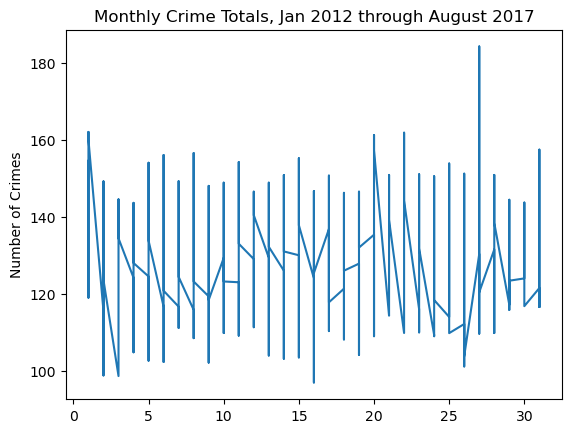

In [10]:
import calendar

year_df = df.copy()
year_df["Year"] = year_df.CrimeDate.dt.year
year_df["Month"] = year_df.CrimeDate.dt.month
year_df["Day"] = year_df.CrimeDate.dt.day
year_df = year_df[year_df.CrimeDate < "2017-09-01"]

_ = year_df.groupby(["Day", "Month", "Year"]).size().groupby(["Day", "Month"]).mean().reset_index(name="mean_crimes")

plt.plot(_.Day, _.mean_crimes)

# Format the plot
#plt.xticks(range(1, 13), labels=calendar.month_abbr[1:])
plt.ylabel("Number of Crimes")
plt.title("Monthly Crime Totals, Jan 2012 through August 2017")
plt.show()

# this is a Frankenstein-ian mess
# my god, what have i done

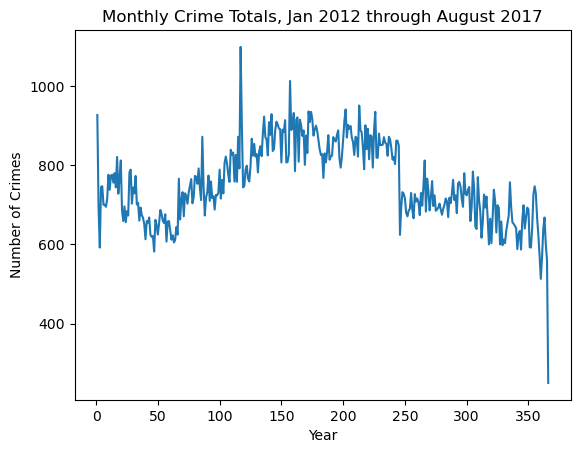

In [11]:
year_df = df.copy()
year_df["Year"] = year_df.CrimeDate.dt.year

# remove February 29th (leap year)
year_df = year_df[~((year_df.CrimeDate.dt.month == 2) & year_df.CrimeDate.dt.day == 29)]

_ = year_df.groupby(year_df.CrimeDate.dt.dayofyear).size().reset_index(name='mean_crime')
_ = _[_.CrimeDate != 60]



plt.plot(_.CrimeDate, _.mean_crime)
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.title("Monthly Crime Totals, Jan 2012 through August 2017")
plt.show()

Month
1    3798.000000
2    3112.333333
3    3680.166667
4    3917.166667
5    4402.000000
Name: Year, dtype: float64


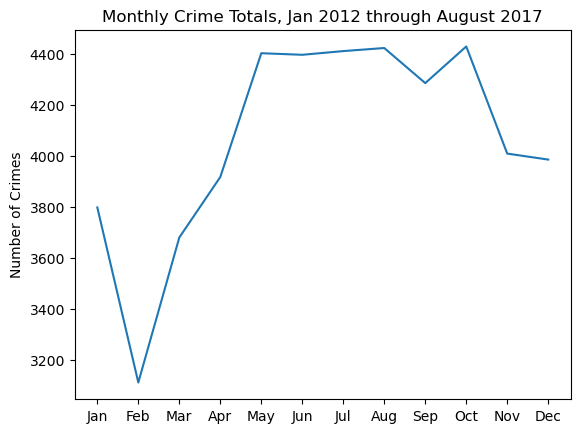

In [12]:
import calendar

year_df = df.copy()
year_df["Year"] = year_df.CrimeDate.dt.year
year_df["Month"] = year_df.CrimeDate.dt.month
year_df = year_df[year_df.CrimeDate < "2017-09-01"]

_ = year_df.groupby("Month")["Year"].value_counts().groupby("Month").mean()

print(_.head())

plt.plot(range(1, 13), _)

# Format the plot
plt.xticks(range(1, 13), labels=calendar.month_abbr[1:])
plt.ylabel("Number of Crimes")
plt.title("Monthly Crime Totals, Jan 2012 through August 2017")
plt.show()

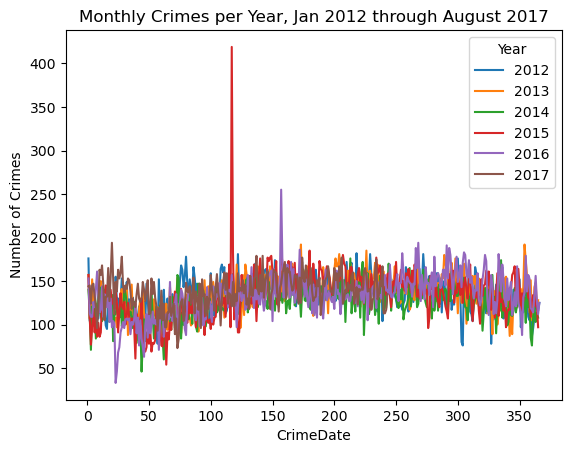

In [29]:
# huge outlier - Freddie Gray
import calendar

year_df = df.copy()
year_df["Year"] = year_df.CrimeDate.dt.year
year_df["Month"] = year_df.CrimeDate.dt.month
year_df["Day"] = year_df.CrimeDate.dt.year
year_df = year_df[year_df.CrimeDate < "2017-09-01"]

_ = year_df.groupby(year_df.CrimeDate.dt.dayofyear)["Year"].value_counts().unstack()
_.plot(kind='line')

# Format the plot
plt.ylabel("Number of Crimes")
plt.title("Monthly Crimes per Year, Jan 2012 through August 2017")
plt.show()

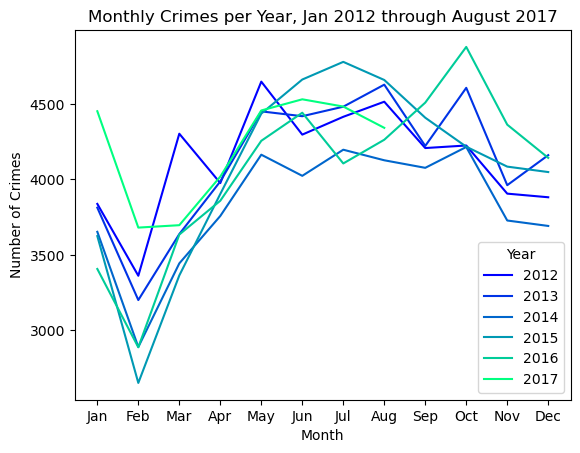

In [13]:
import calendar

year_df = df.copy()
year_df["Year"] = year_df.CrimeDate.dt.year
year_df["Month"] = year_df.CrimeDate.dt.month
year_df = year_df[year_df.CrimeDate < "2017-09-01"]

_ = year_df.groupby("Month")["Year"].value_counts().unstack()
_.plot(kind='line', cmap=plt.colormaps.get_cmap('winter'))

# Format the plot
plt.xticks(range(1, 13), labels=calendar.month_abbr[1:])
plt.ylabel("Number of Crimes")
plt.title("Monthly Crimes per Year, Jan 2012 through August 2017")
plt.show()

# Inside/Outside

<Axes: xlabel='CrimeTimeTemp'>

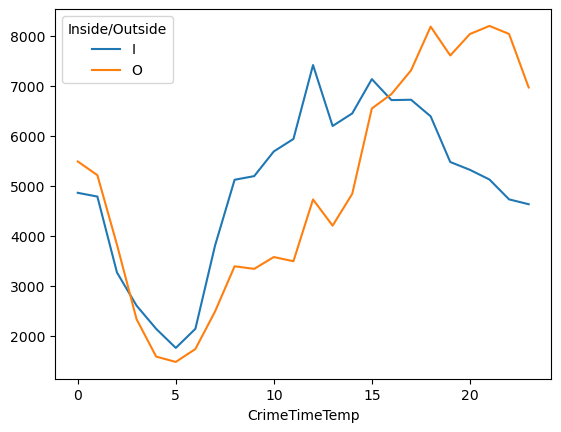

In [14]:
# unstack pivots the table
x = pre2017_df.groupby([pre2017_df["CrimeTimeTemp"].dt.hour, "Inside/Outside"]).size().unstack()

x.plot(kind='line')


In [15]:
# holy shit! another successful ANOVA! time of day does not impact crime level in/out

m = df[df["Time of Day"] == "Morning"].groupby(df["Inside/Outside"]).size()
a = df[df["Time of Day"] == "Afternoon"].groupby(df["Inside/Outside"]).size()
e = df[df["Time of Day"] == "Evening"].groupby(df["Inside/Outside"]).size()
n = df[df["Time of Day"] == "Late Night"].groupby(df["Inside/Outside"]).size()

st.f_oneway(m, a, e, n)

F_onewayResult(statistic=2.5018363212325165, pvalue=0.19835815971583926)

## crime description pie chart

Description
AGG. ASSAULT         27513
AUTO THEFT           26838
BURGLARY             42538
COMMON ASSAULT       45518
LARCENY              60528
LARCENY FROM AUTO    36295
Other                19608
ROBBERY - STREET     17691
Name: count, dtype: int64


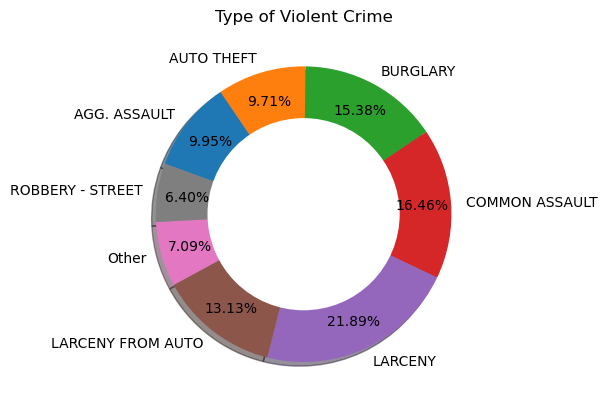

In [68]:
desc_df = df.Description.value_counts()
desc_df = desc_df.to_frame().reset_index()
desc_df.rename(columns={'index': 'Description', 'Description': 'count'}, inplace=True)

small_values = (desc_df['count'] /len(df)) < .05
desc_df.loc[small_values, 'Description'] = 'Other'
desc_df = desc_df.groupby('Description')['count'].sum()
print(desc_df)

plt.pie(
    desc_df.values,
    labels=desc_df.index,
    #explode=(0.03, 0.15, 0.03, 0.03),
    shadow=True,
    startangle=160,
    autopct="%1.2f%%",
    pctdistance=0.8,
    counterclock=False,
)

plt.title("Type of Violent Crime")

# gcf get current figure, gca get current axis
donut = plt.Circle((0, 0), 0.65, facecolor="white")
plt.gcf().gca().add_artist(donut)

plt.show()

## Plot crime around the day(s) of the Freddie Gray riots? Outliers...